<a href="https://colab.research.google.com/github/chonholee/tutorial/blob/main/bigdata/BigDataII_14_QA_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dwave-ocean-sdk

# 例３：量子アニーリングで巡回セールスマン問題を解く

参照

https://leadinge.co.jp/rd/2021/06/21/966/

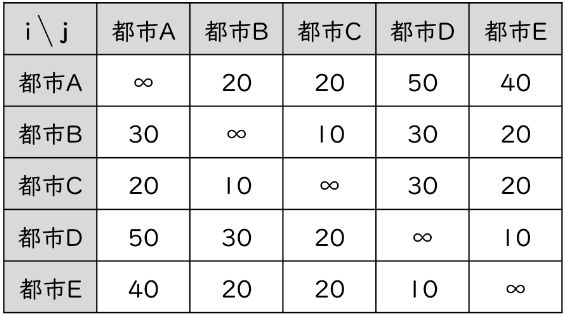

In [ ]:
import numpy as np

N = 5

Q = np.array([[1000, 20, 20, 50, 40],
              [30, 1000, 10, 30, 20],
              [20, 10, 1000, 30, 20],
              [50, 30, 20, 1000, 10],
              [40, 20, 20, 10, 1000]])

## X{i,k}、X{j,k+1}は0か1の値で、都市iを時刻kに訪れるか訪れないかを表す

### **そう移動距離が最小となり、かつ条件を満たす、この表（組み合わせ）を探すことが目的**

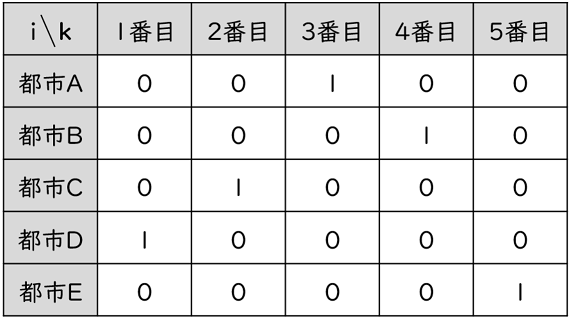



## エネルギー（目的関数）＝　コスト関数　＋　制約関数

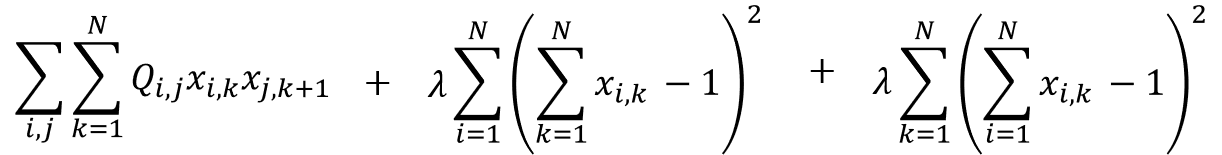

In [ ]:
from pyqubo import Array, Constraint, Placeholder

x = Array.create('x', shape=(N,N), vartype='BINARY')

cost = 0
for i in range(N):
  for j in range(N):
    cost = cost + Q[i][j] * x[i][j]

constr_1 = 0
for i in range(N):
  constr_1 += (np.sum(x[i])-1)**2

constr_2 = 0
for i in range(N):
  constr_2 += (np.sum(x.T[i])-1)**2


In [ ]:
cost_func = cost + Placeholder('lam') * Constraint(constr_1, label='constr_1') + Placeholder('lam') * Constraint(constr_2, label='constr_2')

model = cost_func.compile()


### 目的関数をQUBO形式（量子マシンで動かせる形式）に変換してくれる

In [ ]:
feed_dict = {'lam': 100.0}
qubo, offset = model.to_qubo(feed_dict=feed_dict)

# DWaveSampler

**Dwaveマシンで実行**

※TokenはDwaveのDashboradから取得する


In [ ]:
token = '**' # DWave Leap Token
endpoint = 'https://cloud.dwavesys.com/sapi/'

In [ ]:
from dwave.system import DWaveSampler, EmbeddingComposite

dw_sampler = DWaveSampler(solver='DW_2000Q_6', token=token, endpoint=endpoint)

In [ ]:
sampler = EmbeddingComposite(dw_sampler)

In [ ]:
sampleset = sampler.sample_qubo(qubo, num_reads=10)

**結果を表示**

In [ ]:
sampleset.record

**結果を問題の解答として解釈**

In [ ]:
sampleset.record[0][0].reshape(N,N)